---
# 10.1 General approximation and interpolation
---

A function $p$ is a **polynomial of degree at most $n$** if

$$p(x) = c_0 + c_1 x + \cdots + c_n x^n.$$

Polynomials hold a prominent role in numerical analysis for three reasons:

1. Polynomials can approximate any continuous function $f$ as close as we want:

 > ### [Weierstrass Approximation Theorem](http://en.wikipedia.org/wiki/Stone%E2%80%93Weierstrass_theorem):
 >
 > Let $f \in C[a,b]$. For every $\varepsilon > 0$, there exists a polynomial $p(x)$ such that
 >
 > $$\left|f(x) - p(x)\right| < \varepsilon, \quad \forall x \in [a,b].$$

2. Polynomials can be efficiently evaluated using **Horner's Rule**:

  $$p(x) = \bigg( \Big( \big(c_n x + c_{n-1}\big)x + c_{n-2} \Big)x + \cdots + c_1\bigg)x + c_0$$

3. Polynomials are **simple**:  it is easy to sum, multiply, differentiate, and integrate polynomials.

---

## Horner's Rule

In [1]:
# Evaluate the polynomial 
#
#     p(x) = c_0 + c_1 x + ... + c_n x^n
#
# where c = [c_0, c_1, ..., c_n] using Horner's Rule.
function horner(x, c)
    
    n = length(c) - 1
    p = c[n+1]
    for j = n:-1:1
        p = p*x + c[j]
    end
    
    return p
end

horner (generic function with 1 method)

In [2]:
using Plots, LaTeXStrings

c = [-3, 5, 2, -1]   # p(x) = -3 + 5x + 2x^2 - x^3

p(x) = horner(x, c)

p (generic function with 1 method)

In [3]:
p(-2.0)

3.0

In [4]:
x = -2.0
px = -3 + 5x + 2x^2 - x^3

3.0

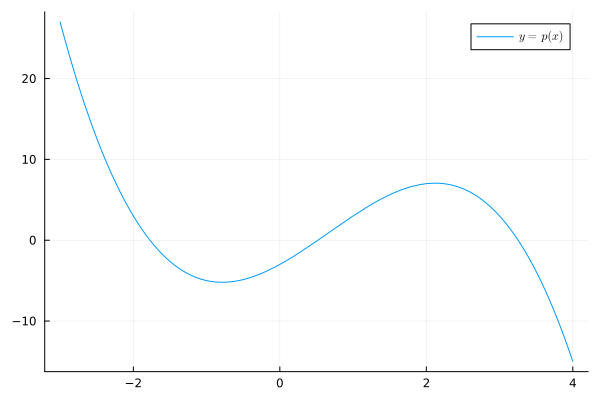

In [5]:
plot(p, -3, 4, label=L"y = p(x)")

---

## Two types of problems

The function $f$ we would like to approximate by a polynomial may be given to us as:

1. **A fixed set of data points**: $\big\{(x_i, y_i)\big\}_{i=0}^n$, where $y_i = f(x_i)$, but the actual function $f$ is unknown to us.
   
2. **An explicit/implicit function**: We are free to choose the $x_i$ and compute $y_i = f(x_i)$, but evaluating $f$ may be expensive.

In either case, the goal is to find a polynomial $p$ that **interpolates** the data:
   
   $$p(x_i) = y_i, \quad i = 0,1,\ldots,n.$$ 
   

---

## Estimating the function $f$

After constructing an interpolating polynomial $p$, we can use $p$ to **estimate** the value of $f$ at other values of $x$. We hope that

$$ p(x) \approx f(x), \quad \forall x \in [a,b].$$

We call the estimation of $f(x)$:

1. **interpolation** if 
    $$x_i < x < x_j, \quad \text{for some } i \neq j,$$

2. **extrapolation** if 
    $$ x < x_i,\ \forall i \quad \text{or} \quad x > x_i,\ \forall i.$$

---

## Interpolating polynomial always exists and is unique

> ### Theorem:
>
> Let $\big\{(x_i,y_i)\big\}_{i=0}^n$. If $x_i \neq x_j$ for $i \neq j$, then there exists a unique polynomial $p(x)$ with degree at most $n$ that satisfies
>
>   $$p(x_i) = y_i, \quad i = 0,1,\ldots,n.$$ 

---

## The space of polynomials $
%%% My LaTeX definitions
\DeclareMathOperator{\span}{span}
\newcommand{\Pbf}{\mathbf{P}}
$

Let $\Pbf_n$ be the set of polynomials with degree at most $n$. 

$\Pbf_n$ is a **vector space** since it is closed under addition and scalar multiplication:

1. $p_1(x),\ p_2(x) \in \Pbf_n \implies p_1(x)+p_2(x) \in \Pbf_n$
2. $c \in \mathbb{R},\ p(x) \in \Pbf_n \implies cp(x) \in \Pbf_n$

Note that $\dim \Pbf_n = n+1$.

## A basis for $\Pbf_n$

Let $\big\{\phi_j(x)\big\}_{j=0}^n$ be a **basis** for $\Pbf_n$; that is:

1. $\phi_0(x), \ldots, \phi_n(x)$ are **linearly independent**:

    $$
    c_0 \phi_0(x) + \cdots + c_n \phi_n(x) = 0
    \quad \implies \quad
    c_0 = \cdots = c_n = 0
    $$
    
2. $\phi_0(x), \ldots, \phi_n(x)$ **spans** $\Pbf_n$:
    
    $$
    \mathbf{P}_n = \span\big\{\phi_0(x),\ldots,\phi_n(x)\big\}
    $$
    

Every $p(x) \in \Pbf_n$ is therefore a _unique_ linear combination of the polynomials in $\big\{\phi_j(x)\big\}_{j=0}^n$:
    
$$p(x) = \sum_{j=0}^n c_j \phi_j(x) = c_0 \phi_0(x) + \cdots + c_n \phi_n(x).$$

## Computing the unique interpolating polynomial 

Given $\big\{(x_i, y_i)\big\}_{i=0}^n$, we want to find the unique $p(x) \in \Pbf_n$ that satisfies

$$p(x_i) = y_i, \quad i = 0, 1, \ldots, n.$$

Thus, we just need to find scalars $c_0,\ldots,c_n$ such that

$$
\begin{gather}
p(x_0) = c_0 \phi_0(x_0) + \cdots + c_n \phi_n(x_0) = y_0\\
p(x_1) = c_0 \phi_0(x_1) + \cdots + c_n \phi_n(x_1) = y_1\\
\vdots\\
p(x_n) = c_0 \phi_0(x_n) + \cdots + c_n \phi_n(x_n) = y_n\\
\end{gather}
$$

This is equivalent to the linear system $A c = y$:

$$
\begin{bmatrix}
\phi_0(x_0) & \phi_1(x_0) & \cdots & \phi_n(x_0)\\
\phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_n(x_1)\\
\vdots & \vdots & \ddots & \vdots\\
\phi_0(x_n) & \phi_1(x_n) & \cdots & \phi_n(x_n)\\
\end{bmatrix}
\begin{bmatrix}
c_0\\
c_1\\
\vdots\\
c_n\\
\end{bmatrix}
=
\begin{bmatrix}
y_0\\
y_1\\
\vdots\\
y_n\\
\end{bmatrix}.
$$

## Using different bases for $\Pbf_n$

Any basis $\big\{\phi_j(x)\big\}_{j=0}^n$ we use will give us the same interpolating polynomial $p(x)$, but different bases will have different computational properties.

We will study **three** different bases:

1. (Section 10.2) **Monomial basis** $\{1, x, x^2, \ldots, x^n\}$, for which the matrix $A$ is often ill-conditioned;
2. (Section 10.3) **Lagrange polynomial basis**, for which the matrix $A$ is the identity matrix $I$;
3. (Section 10.4) **Newton polynomial basis**, for which the matrix $A$ is lower triangular.

In each case we will look at how to **construct** $p(x)$ and how to **evaluate** $p(x)$.

---